In [18]:
#import the package we need
import pandas as pd
import numpy as np
import pylab as pl 
import statsmodels.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#设置pandas输出所有数据
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

# 1 Introduction to the Logistic Rgression Model

## 1.1 Introduction

In [28]:
#read the data sets CHDAGE
data = pd.read_table('D:/GitHub/applied_logistic_regression/data/CHDAGE/CHDAGE/CHDAGE.txt',header=0,encoding='gb2312',index_col='ID')
data.loc[data.AGE<30,'AGEGRP']=1
data.loc[(data.AGE>=30) & (data.AGE<35),'AGEGRP']=2
data.loc[(data.AGE>=35) & (data.AGE<40),'AGEGRP']=3
data.loc[(data.AGE>=40) & (data.AGE<45),'AGEGRP']=4
data.loc[(data.AGE>=45) & (data.AGE<50),'AGEGRP']=5
data.loc[(data.AGE>=50) & (data.AGE<55),'AGEGRP']=6
data.loc[(data.AGE>=55) & (data.AGE<60),'AGEGRP']=7
data.loc[data.AGE>=60,'AGEGRP']=8
data

,AGE,CHD,AGEGRP
ID,,,
1,20,0,1.0
2,23,0,1.0
3,24,0,1.0
5,25,1,1.0
4,25,0,1.0
7,26,0,1.0
6,26,0,1.0
9,28,0,1.0
8,28,0,1.0


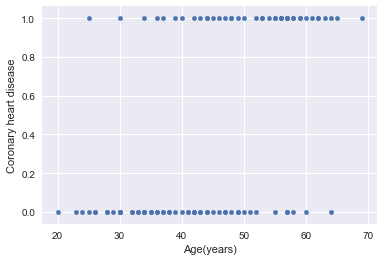

In [33]:
plt.figure()
#plt.scatter(data['AGE'],data['CHD'])
plot1=data.plot(x='AGE',y='CHD',kind='scatter')
plot1.set_ylabel('Coronary heart disease')
plot1.set_xlabel('Age(years)')

In [48]:
#one way table
table=pd.crosstab(index=data['AGEGRP'],columns='count')
table 
#confirm the crosstab is a dataframe
type(table)

#two way tables/
table2=pd.crosstab(index=data['AGEGRP'],columns=data['CHD'],margins=True)
table2.index=["20-29","30-34","35-39","40-44","45-49","50-54","55-59","60-69","Total"]
table2.columns=["Absent","Present","Total"]
table2

col_0,count
AGEGRP,
1.0,10
2.0,15
3.0,12
4.0,15
5.0,13
6.0,8
7.0,17
8.0,10


pandas.core.frame.DataFrame

,Absent,Present,Total
20-29,9,1,10
30-34,13,2,15
35-39,9,3,12
40-44,10,5,15
45-49,7,6,13
50-54,3,5,8
55-59,4,13,17
60-69,2,8,10
Total,57,43,100


## 1.2 Fitting the Logistic Regression Model

In [6]:
#read the data sets CHDAGE
data = pd.read_table('D:/GitHub/applied_logistic_regression/data/CHDAGE/CHDAGE/CHDAGE.txt',header=0,encoding='gb2312',index_col='ID')
data.head()

,AGE,CHD
ID,,
1,20,0
2,23,0
3,24,0
5,25,1
4,25,0


In [9]:
target=data['CHD']
var=data[['AGE']]
var = sm.add_constant(var)

In [10]:
logit = sm.Logit(target, var)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.536765
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CHD   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Aug 2017   Pseudo R-squ.:                  0.2145
Time:                        22:37:08   Log-Likelihood:                -53.677
converged:                       True   LL-Null:                       -68.331
                                        LLR p-value:                 6.168e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.3095      1.134     -4.683      0.000        -7.531    -3.088
AGE            0.1109      0.

In [17]:
#输出fitted values 和 logit


## 1.4 Confidence Interval Estimation

In [ ]:
the CI of logit(covariance matrix 上机)

# 3 Interpretation of the Fitted Logistic Regression


## 3.6 Presentation and Interpretation of the Fitted Values


In [50]:
#read the data sets described in Section 1.6 the Burn Study
data = pd.read_table('D:/GitHub/applied_logistic_regression/data/BURN/BURN1000.txt',header=0,encoding='gb2312',index_col='ID')

In [27]:
data.head()

,FACILITY,DEATH,AGE,GENDER,RACEC,TBSA,INH_INJ,FLAME
ID,,,,,,,,
1,11,0,26.6,1,1,25.3,0,1
2,1,0,2.0,0,0,5.0,0,0
3,12,0,22.0,0,0,2.0,0,0
4,1,0,37.3,1,1,2.0,0,0
5,1,0,52.1,1,1,6.0,0,1


In [59]:
target=data['DEATH']
var=data[['TBSA','INH_INJ']]
var = sm.add_constant(var)
var.head()

,const,TBSA,INH_INJ
ID,,,
1,1,25.3,0
2,1,5.0,0
3,1,2.0,0
4,1,2.0,0
5,1,6.0,0


In [60]:
logit = sm.Logit(target, var)

In [1]:
result = logit.fit()
print(result.summary())

NameError: name 'logit' is not defined

# 4 Purpose Selection of Covariates

### 4.2.1 Methods to Examine the Scale of a Continuous Covariate in the Logit

#### Method 2

In [26]:
#read the data Scale_Example
data = pd.read_excel('D:/GitHub/applied_logistic_regression/data/Scale Example/Scale_Example.xlsx')
x=data["X"]
y=data["Y"]
data

,Y,X
0,0,27.88814
1,0,26.41320
2,0,25.79367
3,1,22.48335
4,0,26.93008
5,1,21.31120
6,1,21.73849
7,1,22.05013
8,1,24.02452
9,1,22.61062


In [9]:
bin_x=[data['X'].quantile(0),data['X'].quantile(0.25),data['X'].quantile(0.5),data['X'].quantile(0.75),data['X'].quantile(1)]
#bin_x=[0,32,44,56,100]
print(bin_x)

[20.23825, 31.986124999999998, 44.139185, 56.43967, 69.99924]


In [10]:
#将Age转成dummy
x_Dummy=pd.get_dummies(pd.cut(x, bin_x))
x_Dummy.columns=['X_1','X_2','X_3','X_4']
print(x_Dummy.head())

   X_1  X_2  X_3  X_4
0    1    0    0    0
1    1    0    0    0
2    1    0    0    0
3    1    0    0    0
4    1    0    0    0


In [12]:
x_Dummy_1=data.join(x_Dummy,how='left').iloc[:,[1,2,3,4,5]]
x_Dummy_1[x_Dummy_1['X_2']>0]

,X,X_1,X_2,X_3,X_4
125,41.26556,0,1,0,0
126,36.06550,0,1,0,0
127,43.48637,0,1,0,0
128,39.37428,0,1,0,0
129,36.39791,0,1,0,0
130,33.92283,0,1,0,0
131,38.74301,0,1,0,0
132,40.19699,0,1,0,0
133,37.05206,0,1,0,0
134,43.72809,0,1,0,0


In [13]:
#fitting themodel containing all covariates

varX=x_Dummy_1.loc[:,[ 'X_2', 'X_3', 'X_4']]
#varX=BURN1000.drop(['DEATH'],1)

varX = sm.add_constant(varX)
varX

,const,X_2,X_3,X_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [90]:
logit = sm.Logit(y,varX)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.439795
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Aug 2017   Pseudo R-squ.:                  0.2583
Time:                        23:24:51   Log-Likelihood:                -219.90
converged:                       True   LL-Null:                       -296.48
                                        LLR p-value:                 5.487e-33
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7538      0.192      3.931      0.000         0.378     1.130
X_2           -2.2433      0.

In [102]:
#PLOT 
Xasix=[(bin_x[0]+bin_x[1])/2,(bin_x[1]+bin_x[2])/2,(bin_x[2]+bin_x[3])/2,(bin_x[3]+bin_x[4])/2]
print(Xasix)
Yplot=[0,-2.2433,-4.4592,-1.9508]
print(Yplot)


[26.112187499999997, 38.062655, 50.2894275, 63.219454999999996]
[0, -2.2433, -4.4592, -1.9508]


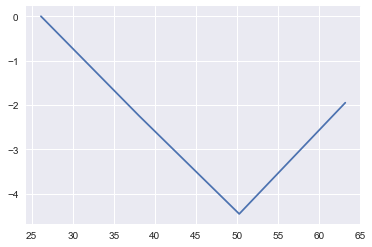

In [107]:
plt.figure()
plt.plot(Xasix,Yplot) 

#### Method 3: fractional polynominals

In [31]:
data_M3=data
data_M3['const']=1
data_M3['X_power_m2']=data_M3['X']**(-2)
data_M3['X_power_2']=data_M3['X']**(2)
data_M3['X_ln']=np.log(data_M3['X'])
data_M3['X_ln_power_2']=data_M3['X_ln']*data_M3['X_power_2']

In [33]:
# Linear
logit_1 = sm.Logit(data_M3['Y'],data_M3[['const','X']])
result_1 = logit_1.fit()
print(result_1.summary())

# m=1 Powers -2
logit_2 = sm.Logit(data_M3['Y'],data_M3[['const','X_power_m2']])
result_2 = logit_2.fit()
print(result_2.summary())
# m=2 Power 2 2
logit_3 = sm.Logit(data_M3['Y'],data_M3[['const','X_power_2','X_ln_power_2']])
result_3 = logit_3.fit()
print(result_3.summary())

Optimization terminated successfully.
         Current function value: 0.521007
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      498
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Aug 2017   Pseudo R-squ.:                  0.1213
Time:                        16:21:41   Log-Likelihood:                -260.50
converged:                       True   LL-Null:                       -296.48
                                        LLR p-value:                 2.212e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7604      0.346      5.090      0.000       1.083       2.438
X             -0.0651      0.

### 4.2.2 Examples of Purposeful Selection

#### Example 1: The Glow Study

In [96]:
#read the GLOW500 data
GLOW500 = pd.read_table('D:/GitHub/applied_logistic_regression/data/GLOW/GLOW500.txt')
GLOW500

,SUB_ID,SITE_ID,PHY_ID,PRIORFRAC,AGE,WEIGHT,HEIGHT,BMI,PREMENO,MOMFRAC,ARMASSIST,SMOKE,RATERISK,FRACSCORE,FRACTURE
0,1,1,14,0,62,70.3,158,28.16055,0,0,0,0,2,1,0
1,2,4,284,0,65,87.1,160,34.02344,0,0,0,0,2,2,0
2,3,6,305,1,88,50.8,157,20.60936,0,1,1,0,1,11,0
3,4,6,309,0,82,62.1,160,24.25781,0,0,0,0,1,5,0
4,5,1,37,0,61,68.0,152,29.43213,0,0,0,0,2,1,0
5,6,5,299,1,67,68.0,161,26.23356,0,0,0,1,2,4,0
6,7,5,302,0,84,50.8,150,22.57778,0,0,0,0,1,6,0
7,8,1,36,1,82,40.8,153,17.42919,0,0,0,0,2,7,0
8,9,1,8,1,86,62.6,156,25.72321,0,0,0,0,2,7,0
9,10,4,282,0,58,63.5,166,23.04398,0,0,0,0,1,0,0


In [130]:
bin=[GLOW500['AGE'].quantile(0),GLOW500['AGE'].quantile(0.25),GLOW500['AGE'].quantile(0.5),GLOW500['AGE'].quantile(0.75),GLOW500['AGE'].quantile(1)]
bin

[55.0, 61.0, 67.0, 76.0, 90.0]

In [97]:
# the AGE 
GLOW500['AGE_DUMMY']=pd.qcut(GLOW500['AGE'],4,labels=['Q1','Q2','Q3','Q4'])
GLOW500=pd.get_dummies(GLOW500,columns=['AGE_DUMMY','RATERISK'])
GLOW500['const']=1
GLOW500

,SUB_ID,SITE_ID,PHY_ID,PRIORFRAC,AGE,WEIGHT,HEIGHT,BMI,PREMENO,MOMFRAC,...,FRACSCORE,FRACTURE,AGE_DUMMY_Q1,AGE_DUMMY_Q2,AGE_DUMMY_Q3,AGE_DUMMY_Q4,RATERISK_1,RATERISK_2,RATERISK_3,const
0,1,1,14,0,62,70.3,158,28.16055,0,0,...,1,0,0,1,0,0,0,1,0,1
1,2,4,284,0,65,87.1,160,34.02344,0,0,...,2,0,0,1,0,0,0,1,0,1
2,3,6,305,1,88,50.8,157,20.60936,0,1,...,11,0,0,0,0,1,1,0,0,1
3,4,6,309,0,82,62.1,160,24.25781,0,0,...,5,0,0,0,0,1,1,0,0,1
4,5,1,37,0,61,68.0,152,29.43213,0,0,...,1,0,1,0,0,0,0,1,0,1
5,6,5,299,1,67,68.0,161,26.23356,0,0,...,4,0,0,1,0,0,0,1,0,1
6,7,5,302,0,84,50.8,150,22.57778,0,0,...,6,0,0,0,0,1,1,0,0,1
7,8,1,36,1,82,40.8,153,17.42919,0,0,...,7,0,0,0,0,1,0,1,0,1
8,9,1,8,1,86,62.6,156,25.72321,0,0,...,7,0,0,0,0,1,0,1,0,1
9,10,4,282,0,58,63.5,166,23.04398,0,0,...,0,0,1,0,0,0,1,0,0,1


In [100]:
logit = sm.Logit(GLOW500['FRACTURE'],GLOW500[['AGE_DUMMY_Q2','AGE_DUMMY_Q3','AGE_DUMMY_Q4','const','HEIGHT','PRIORFRAC','MOMFRAC','ARMASSIST','RATERISK_3']])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.507657
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               FRACTURE   No. Observations:                  500
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            8
Date:                Sun, 13 Aug 2017   Pseudo R-squ.:                 0.09723
Time:                        11:02:12   Log-Likelihood:                -253.83
converged:                       True   LL-Null:                       -281.17
                                        LLR p-value:                 5.099e-09
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
AGE_DUMMY_Q2     0.6096      0.341      1.787      0.074        -0.059     1.278
AGE_DUMMY_Q3     0.5899

In [117]:
result.params

AGE_DUMMY_Q2    0.609619
AGE_DUMMY_Q3    0.589891
AGE_DUMMY_Q4    0.969888
const           5.155657
HEIGHT         -0.046326
PRIORFRAC       0.645859
MOMFRAC         0.643105
ARMASSIST       0.505666
RATERISK_3      0.460811
dtype: float64

[58.0, 64.0, 71.5, 83.0]

[0, 0.609619, 0.589891, 0.9698888]

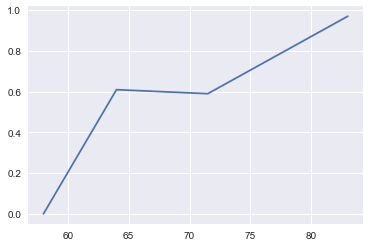

In [135]:
#PLOT 
Xasix=[(bin[0]+bin[1])/2,(bin[1]+bin[2])/2,(bin[2]+bin[3])/2,(bin[3]+bin[4])/2]
Xasix
Yplot=[0,0.609619,0.589891,0.9698888]
Yplot

plt.figure()
plt.plot(Xasix,Yplot) 

####  Example 2: The Burn Injury Study 

In [168]:
#read the BURN1000 data
BURN1000 = pd.read_table('D:/GitHub/applied_logistic_regression/data/BURN/BURN1000.txt',header=0,encoding='gb2312',index_col='ID')
BURN1000

,FACILITY,DEATH,AGE,GENDER,RACEC,TBSA,INH_INJ,FLAME
ID,,,,,,,,
1,11,0,26.6,1,1,25.3,0,1
2,1,0,2.0,0,0,5.0,0,0
3,12,0,22.0,0,0,2.0,0,0
4,1,0,37.3,1,1,2.0,0,0
5,1,0,52.1,1,1,6.0,0,1
6,6,0,50.2,1,1,7.0,0,0
7,22,0,2.5,0,0,7.0,0,0
8,1,0,53.8,0,1,0.9,0,1
9,1,0,31.9,1,1,2.0,0,0


In [150]:
#fitting themodel containing all covariates
death=BURN1000['DEATH']
varX=BURN1000.loc[:,['AGE', 'TBSA', 'GENDER', 'RACEC', 'INH_INJ', 'FLAME']]
#varX=BURN1000.drop(['DEATH'],1)
varX = sm.add_constant(varX)
varX

,const,AGE,TBSA,GENDER,RACEC,INH_INJ,FLAME
ID,,,,,,,
1,1,26.6,25.3,1,1,0,1
2,1,2.0,5.0,0,0,0,0
3,1,22.0,2.0,0,0,0,0
4,1,37.3,2.0,1,1,0,0
5,1,52.1,6.0,1,1,0,1
6,1,50.2,7.0,1,1,0,0
7,1,2.5,7.0,0,0,0,0
8,1,53.8,0.9,0,1,0,1
9,1,31.9,2.0,1,1,0,0


In [151]:
logit = sm.Logit(death, varX)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.168231
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  DEATH   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Aug 2017   Pseudo R-squ.:                  0.6020
Time:                        11:44:11   Log-Likelihood:                -168.23
converged:                       True   LL-Null:                       -422.71
                                        LLR p-value:                9.893e-107
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.6952      0.691    -11.133      0.000        -9.050    -6.340
AGE            0.0829      0.

We can see that the Wald test for GENDER and FLAME is not significant. We remove both vatiable.(See the book page 116 for details)

In [152]:
death=BURN1000['DEATH']
varX=BURN1000.loc[:,['AGE', 'TBSA', 'RACEC', 'INH_INJ']]
#varX=BURN1000.drop(['DEATH'],1)

varX = sm.add_constant(varX)

logit = sm.Logit(death, varX)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.169892
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  DEATH   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Sun, 13 Aug 2017   Pseudo R-squ.:                  0.5981
Time:                        11:44:16   Log-Likelihood:                -169.89
converged:                       True   LL-Null:                       -422.71
                                        LLR p-value:                4.052e-108
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.5947      0.609    -12.471      0.000        -8.788    -6.401
AGE            0.0844      0.

Next we need to examine the scale in the logit for **age** and **burn**.

1. First we consider **AGE**

  1.1 use design variable

In [174]:
#取分位数
bin_age=[BURN1000['AGE'].quantile(0),BURN1000['AGE'].quantile(0.25),BURN1000['AGE'].quantile(0.5),BURN1000['AGE'].quantile(0.75),BURN1000['AGE'].quantile(1)]
#bin_age=pd.Series([-100,10.8,31.9,51.2,100])
bin_age


[0.1, 10.850000000000001, 31.95, 51.22500000000001, 89.7]

In [169]:
#将Age转成dummy
BURN1000['AGE_DUMMY']=pd.qcut(BURN1000['AGE'],4,labels=['Q1','Q2','Q3','Q4'])
#[0.1, 10.850000000000001, 31.95, 51.22500000000001, 89.7]
BURN1000=pd.get_dummies(BURN1000,columns=['AGE_DUMMY'])
BURN1000['const']=1
BURN1000
#Age_Dummy.head()

,FACILITY,DEATH,AGE,GENDER,RACEC,TBSA,INH_INJ,FLAME,AGE_DUMMY_Q1,AGE_DUMMY_Q2,AGE_DUMMY_Q3,AGE_DUMMY_Q4,const
ID,,,,,,,,,,,,,
1,11,0,26.6,1,1,25.3,0,1,0,1,0,0,1
2,1,0,2.0,0,0,5.0,0,0,1,0,0,0,1
3,12,0,22.0,0,0,2.0,0,0,0,1,0,0,1
4,1,0,37.3,1,1,2.0,0,0,0,0,1,0,1
5,1,0,52.1,1,1,6.0,0,1,0,0,0,1,1
6,6,0,50.2,1,1,7.0,0,0,0,0,1,0,1
7,22,0,2.5,0,0,7.0,0,0,1,0,0,0,1
8,1,0,53.8,0,1,0.9,0,1,0,0,0,1,1
9,1,0,31.9,1,1,2.0,0,0,0,1,0,0,1


In [171]:
logit = sm.Logit(BURN1000['DEATH'], BURN1000.loc[:,['const','AGE_DUMMY_Q2','AGE_DUMMY_Q3','AGE_DUMMY_Q4','TBSA','RACEC','INH_INJ']])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.184187
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  DEATH   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sun, 13 Aug 2017   Pseudo R-squ.:                  0.5643
Time:                        11:53:45   Log-Likelihood:                -184.19
converged:                       True   LL-Null:                       -422.71
                                        LLR p-value:                7.395e-100
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -5.6384      0.597     -9.445      0.000        -6.808    -4.468
AGE_DUMMY_Q2    -0.4826

In [3]:
#plt.figure()
Xasix=[(bin_age[0]+bin_age[1])/2,(bin_age[1]+bin_age[2])/2,(bin_age[2]+bin_age[3])/2,(bin_age[3]+bin_age[4])/2]
Xasix
Yplot=[0,-0.4826, 1.1386 ,3.7703 ]
plt.plot(Xasix,Yplot) 

NameError: name 'bin_age' is not defined

See that only AGE_DUMMY_Q4 is significant. 

The plot show that the log-odds of dying decreases and then increases,showing subjexts between 15 and 25, all things equal, are known to have better outcomes.

# 5 Assessing the Fit of the Model